In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error

In [ ]:
import pandas as pd
df=pd.read_csv('/content/drive/MyDrive/DA LAB/DA MINI/Precipitation_dataset.csv')
df.head()

,country,location_name,latitude,longitude,timezone,last_updated_epoch,last_updated,temperature_celsius,temperature_fahrenheit,condition_text,...,air_quality_PM2.5,air_quality_PM10,air_quality_us-epa-index,air_quality_gb-defra-index,sunrise,sunset,moonrise,moonset,moon_phase,moon_illumination
0,Afghanistan,Kabul,34.52,69.18,Asia/Kabul,1715849100,2024-05-16 13:15,26.6,79.8,Partly Cloudy,...,8.4,26.6,1,1,04:50 AM,06:50 PM,12:12 PM,01:11 AM,Waxing Gibbous,55
1,Albania,Tirana,41.33,19.82,Europe/Tirane,1715849100,2024-05-16 10:45,19.0,66.2,Partly cloudy,...,1.1,2.0,1,1,05:21 AM,07:54 PM,12:58 PM,02:14 AM,Waxing Gibbous,55
2,Algeria,Algiers,36.76,3.05,Africa/Algiers,1715849100,2024-05-16 09:45,23.0,73.4,Sunny,...,10.4,18.4,1,1,05:40 AM,07:50 PM,01:15 PM,02:14 AM,Waxing Gibbous,55
3,Andorra,Andorra La Vella,42.50,1.52,Europe/Andorra,1715849100,2024-05-16 10:45,6.3,43.3,Light drizzle,...,0.7,0.9,1,1,06:31 AM,09:11 PM,02:12 PM,03:31 AM,Waxing Gibbous,55
4,Angola,Luanda,-8.84,13.23,Africa/Luanda,1715849100,2024-05-16 09:45,26.0,78.8,Partly cloudy,...,183.4,262.3,5,10,06:12 AM,05:55 PM,01:17 PM,12:38 AM,Waxing Gibbous,55


In [ ]:
print(df['last_updated'])

0        2024-05-16 13:15
1        2024-05-16 10:45
2        2024-05-16 09:45
3        2024-05-16 10:45
4        2024-05-16 09:45
               ...       
17028    2024-08-12 08:30
17029    2024-08-12 19:30
17030    2024-08-12 15:30
17031    2024-08-12 14:30
17032    2024-08-12 14:30
Name: last_updated, Length: 17033, dtype: object


In [ ]:
df['last_updated'] = pd.to_datetime(df['last_updated'])

In [ ]:
df.set_index('last_updated',inplace=True)

In [ ]:
df=df.sort_index()

In [ ]:
precip_data = df['precip_mm'].resample('h').mean()

In [ ]:
precip_data.ffill( inplace=True)

In [ ]:
model = ARIMA(precip_data, order=(5, 1, 0))
model_fit = model.fit()

In [ ]:
forecast = model_fit.forecast(steps=10)

In [ ]:
next_timestamps = pd.date_range(start=precip_data.index[-1], periods=11, freq='h')[1:]

In [ ]:
forecast_df = pd.DataFrame({
    'timestamp': next_timestamps,
    'predicted_precip_mm': forecast
})

In [ ]:
forecast_df

,timestamp,predicted_precip_mm
2024-08-13 02:00:00,2024-08-13 02:00:00,0.087358
2024-08-13 03:00:00,2024-08-13 03:00:00,0.093355
2024-08-13 04:00:00,2024-08-13 04:00:00,0.098984
2024-08-13 05:00:00,2024-08-13 05:00:00,0.105883
2024-08-13 06:00:00,2024-08-13 06:00:00,0.105466
2024-08-13 07:00:00,2024-08-13 07:00:00,0.098329
2024-08-13 08:00:00,2024-08-13 08:00:00,0.098039
2024-08-13 09:00:00,2024-08-13 09:00:00,0.099100
2024-08-13 10:00:00,2024-08-13 10:00:00,0.100257
2024-08-13 11:00:00,2024-08-13 11:00:00,0.101268


In [ ]:
forecast_csv_path = 'predicted_precipitation_resampled.csv'
forecast_df.to_csv(forecast_csv_path, index=False)

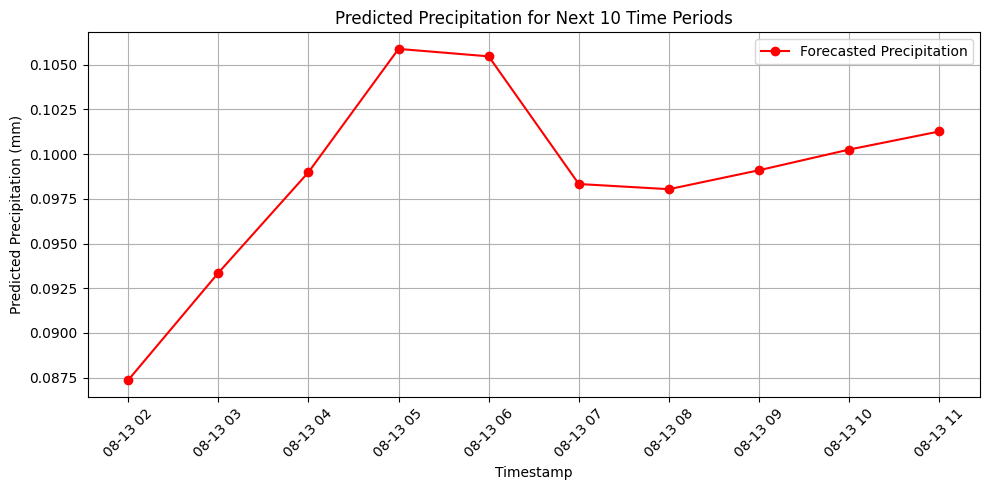

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 5))
plt.plot(next_timestamps, forecast, label='Forecasted Precipitation', color='red', marker='o')
plt.xlabel('Timestamp')
plt.ylabel('Predicted Precipitation (mm)')
plt.title('Predicted Precipitation for Next 10 Time Periods')
plt.xticks(rotation=45)
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()